In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [16]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [22]:
mouse_metadata = pd.read_csv('/Users/anisabraun/Downloads/Mouse_metadata.csv')
study_results = pd.read_csv('/Users/anisabraun/Downloads/Mouse_study_results.csv')
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [23]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [24]:
len(mouse_metadata["Mouse ID"].value_counts())

249

In [25]:
mice_number= mouse_metadata["Mouse ID"].nunique()
total_micedf = pd.DataFrame({"Total Mice":[mice_number]})
total_micedf

,Total Mice
0,249


In [28]:
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"])

In [31]:
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [32]:
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])

In [33]:
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)
Drug_summarydf_a = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Variance_tv, 
                                    "Standard Deviation Tumor Volume": Sdev_tv,
                                     "SEM Tumor Volume":SEM_tv
    
    
})

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [35]:
Drug_summarydf_b = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)
Drug_summarydf_b = Drug_summarydf_b.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SM Tumor Volume"})
Drug_summarydf_b

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

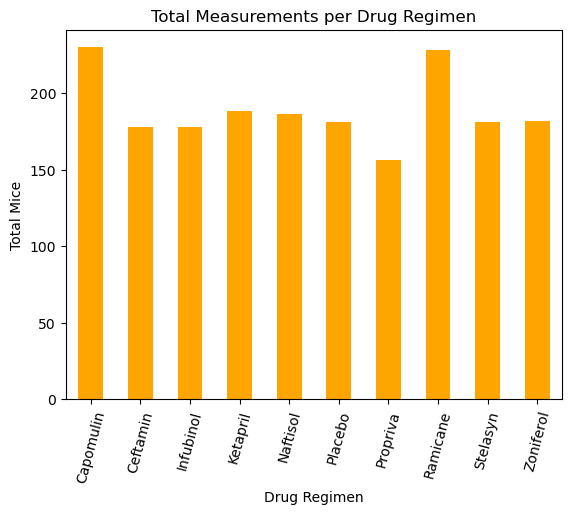

In [39]:
drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Measurements per Drug Regimen", fontsize =10, color = "orange")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot

In [42]:
drug_regimen_ct.head(9)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Total Mice')

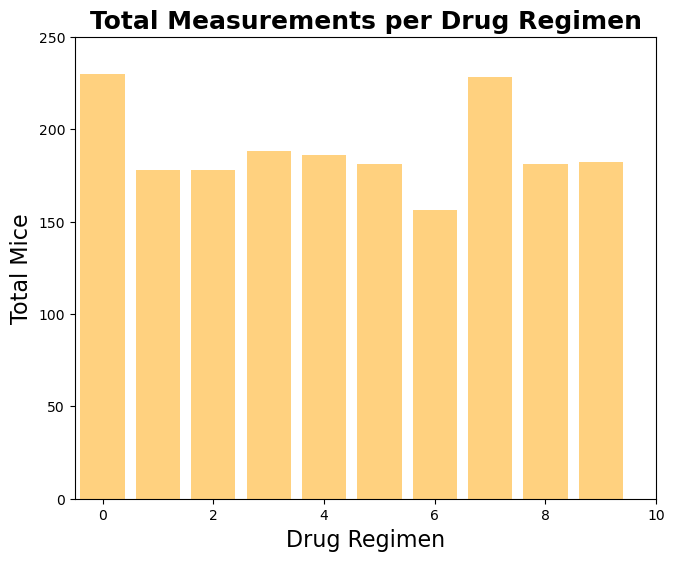

In [46]:
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct
plt.figure(figsize=(7.5,6))
plt.bar(x_axis, y_axis, color ='orange', alpha=0.5, align="center")
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)
plt.title("Total Measurements per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)


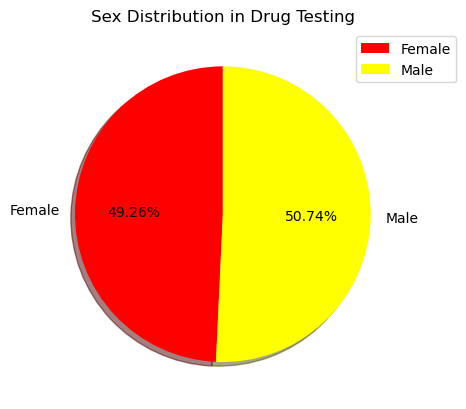

In [48]:
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()
mice_piepd = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                            colors = ["red","yellow"],autopct = "%.2f%%", shadow = True,startangle=90)
mice_piepd.set_ylabel("")
mice_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))

Male      958
Female    930
Name: Sex, dtype: int64

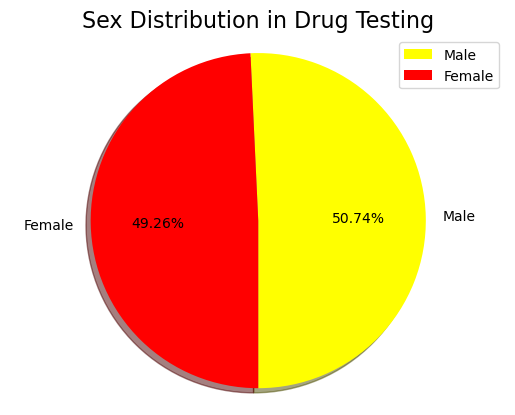

In [49]:
mice_sex = clean_mouse_study["Sex"].value_counts()
explode = (0,0)
colors =["yellow", "red"]
labels = list(mice_sex.index)
plt.pie(mice_sex, explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=270) 
plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
mice_sex

In [50]:
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [51]:
tx_df = pd.merge(max_timepoint , clean_mouse_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [58]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)

In [59]:
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0
quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


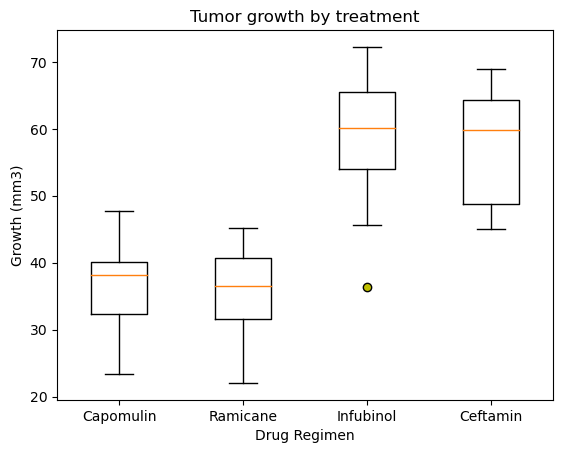

In [64]:
flierprops = dict(marker='.', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

In [65]:
cap_mice = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [66]:
Mouse_l509 = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]

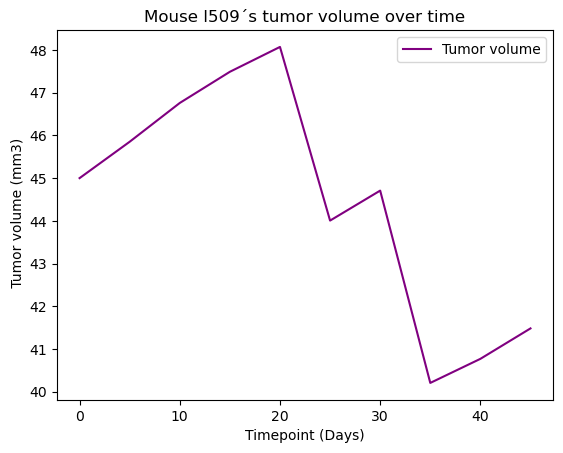

In [68]:
tumor_y = Mouse_l509["Tumor Volume (mm3)"]
time_x = Mouse_l509["Timepoint"]
plt.plot(time_x, tumor_y, color="purple", label="Tumor volume", linestyle = "solid")
plt.legend(loc="best")
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")
plt.show()

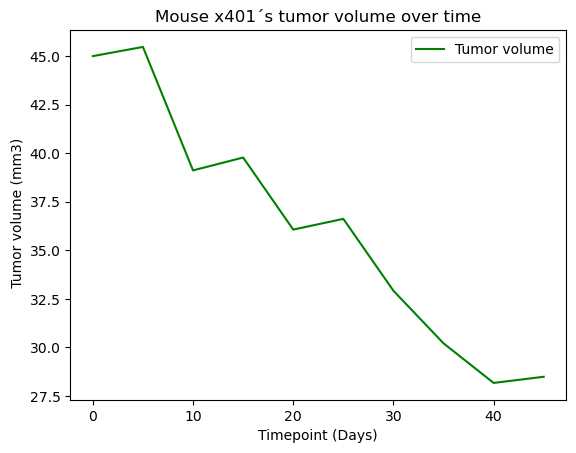

In [69]:
Mouse_x = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "x401"]
tumorx_y = Mouse_x["Tumor Volume (mm3)"]
timex_x = Mouse_x["Timepoint"]
plt.plot(timex_x, tumorx_y, color="green", label="Tumor volume", linestyle = "solid")
plt.legend(loc="best")
plt.title( "Mouse x401´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(timex_x), max(timex_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")
plt.show()

In [70]:
cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor volume (mm3)')

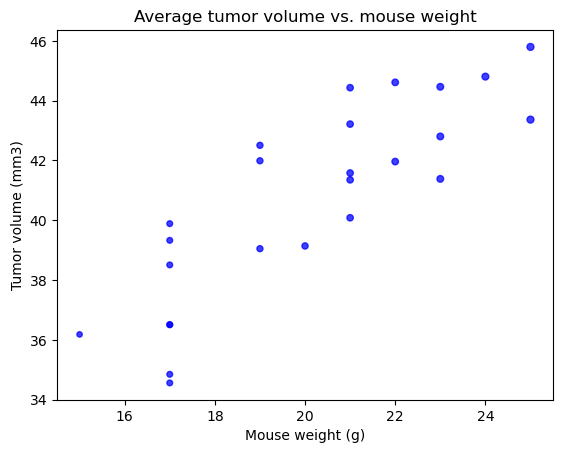

In [74]:
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue", edgecolors="blue",
            s=avg_tumor_vol, alpha=0.75)
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


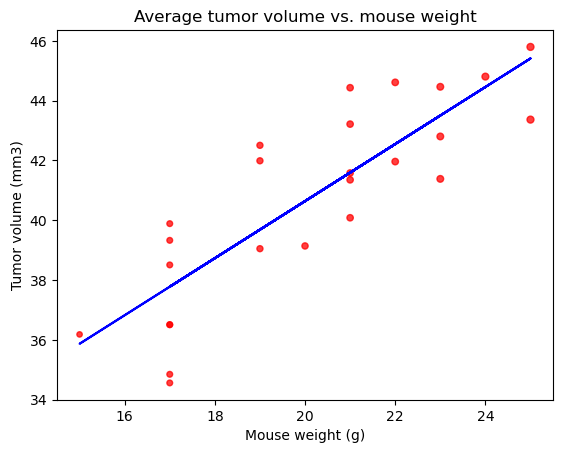

In [76]:
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="red", edgecolors="red",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")

plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)